In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
import cv2
import os
import PIL

In [ ]:
pip install tensorflow_hub

In [ ]:
import tensorflow_hub as hub

In [ ]:
IMAGE_SHAPE=(224,224)
classifier=keras.Sequential([
  hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4",input_shape=IMAGE_SHAPE+(3,))                           
])

In [ ]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving ワキン20120701.jpg to ワキン20120701 (2).jpg


{'ワキン20120701.jpg': b'\xff\xd8\xff\xe13\xfeExif\x00\x00II*\x00\x08\x00\x00\x00\n\x00\x0e\x01\x02\x00 \x00\x00\x00\x86\x00\x00\x00\x0f\x01\x02\x00\x06\x00\x00\x00\xa6\x00\x00\x00\x10\x01\x02\x00\x0e\x00\x00\x00\xac\x00\x00\x00\x12\x01\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00\x1a\x01\x05\x00\x01\x00\x00\x00\xcc\x00\x00\x00\x1b\x01\x05\x00\x01\x00\x00\x00\xd4\x00\x00\x00(\x01\x03\x00\x01\x00\x00\x00\x02\x00\x00\x002\x01\x02\x00\x14\x00\x00\x00\xdc\x00\x00\x00\x13\x02\x03\x00\x01\x00\x00\x00\x02\x00\x00\x00i\x87\x04\x00\x01\x00\x00\x00\xf0\x00\x00\x00^\r\x00\x00                               \x00Canon\x00Canon IXY 30S\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xb4\x00\x00\x00\x01\x00\x00\x00\xb4\x00\x00\x00\x01\x00\x00\x002012:07:01 13:28:14\x00 \x00\x9a\x82\x05\x00\x01\x00\x00\x00v\x02\x00\x00\x9d\x82\x05\x00\x01\x00\x00\x00~\x02\x00\x00\'\x88\x03\x00\x01\x00\x00\x00\xf4\x01\x00\x00\x00\x90\x07\x00\x04\x00\x00\x000221\x03\x90\x02\x00\x14\x00\x00\x00\x86\x02

In [ ]:
gold_fish=PIL.Image.open("/content/ワキン20120701.jpg").resize(IMAGE_SHAPE)

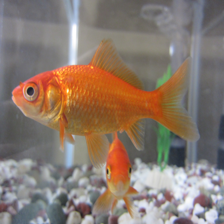

In [ ]:
gold_fish

In [ ]:
img=cv2.imread(str("/content/ワキン20120701.jpg"))

In [ ]:
img.shape

(2112, 2816, 3)

In [ ]:
gold_fish=cv2.resize(img,(224,224))

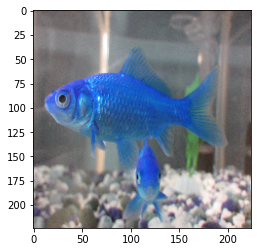

In [ ]:
plt.imshow(gold_fish)

In [ ]:
gold_fish[np.newaxis,...].shape

(1, 224, 224, 3)

In [ ]:
np.argmax(classifier.predict(gold_fish[np.newaxis,...]))

917

In [ ]:
dataset_url="http://download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=keras.utils.get_file("flower_photos",cache_dir=".",origin=dataset_url,untar=True)

In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib

In [ ]:
data_dir=pathlib.Path(data_dir)

In [ ]:
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
flower_list={
    "daisy":list(data_dir.glob("daisy/*")),
    "dandelion":list(data_dir.glob("dandelion/*")),
    "roses":list(data_dir.glob("roses/*")),
    "sunflowers":list(data_dir.glob("sunflowers/*")),
    "tulips":list(data_dir.glob("tulips/*"))
}

In [ ]:
flower_index={
    "daisy":0,
    "dandelion":1,
    "roses":2,
    "sunflowers":3,
    "tulips":4
}

In [ ]:
x,y=[],[]
for flower,lists in flower_list.items():
  for li in lists:
    img_arr=cv2.imread(str(li))
    res_img=cv2.resize(img_arr,(224,224))
    x.append(res_img)
    y.append(flower_index[flower])

In [ ]:
x=np.array(x)
y=np.array(y)

In [ ]:
x=x/255

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=45)

In [ ]:
x_train.shape

(2569, 224, 224, 3)

In [ ]:
x_train[0]

array([[[0.04705882, 0.23921569, 0.35294118],
        [0.03137255, 0.24313725, 0.3372549 ],
        [0.02745098, 0.24313725, 0.34117647],
        ...,
        [0.04313725, 0.12156863, 0.15294118],
        [0.03529412, 0.12941176, 0.18039216],
        [0.04313725, 0.14509804, 0.20392157]],

       [[0.03921569, 0.24705882, 0.35686275],
        [0.02745098, 0.25098039, 0.34901961],
        [0.03137255, 0.24705882, 0.34901961],
        ...,
        [0.03921569, 0.12156863, 0.16078431],
        [0.03529412, 0.14117647, 0.18823529],
        [0.04313725, 0.15294118, 0.21176471]],

       [[0.04313725, 0.25098039, 0.36470588],
        [0.03137255, 0.25490196, 0.35294118],
        [0.03921569, 0.25098039, 0.35686275],
        ...,
        [0.04705882, 0.1254902 , 0.16862745],
        [0.03921569, 0.14901961, 0.19215686],
        [0.04705882, 0.16078431, 0.21568627]],

       ...,

       [[0.05490196, 0.31372549, 0.47058824],
        [0.03137255, 0.29019608, 0.41960784],
        [0.        , 0

In [ ]:
feature_extraction_model="https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/feature_vector/4"
pretrained_model_without_top_layer=hub.KerasLayer(
    feature_extraction_model,input_shape=(224,224,3),trainable=False
)

In [ ]:
model=keras.Sequential(
    [
     pretrained_model_without_top_layer,
     keras.layers.Dense(5,activation="softmax")
    ]
)
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
81/81 [==============================] - 15s 113ms/step - loss: 1.1106 - accuracy: 0.5677
Epoch 2/5
81/81 [==============================] - 9s 108ms/step - loss: 0.3799 - accuracy: 0.8772
Epoch 3/5
81/81 [==============================] - 9s 107ms/step - loss: 0.2960 - accuracy: 0.9084
Epoch 4/5
81/81 [==============================] - 9s 108ms/step - loss: 0.2071 - accuracy: 0.9414
Epoch 5/5
81/81 [==============================] - 9s 107ms/step - loss: 0.1755 - accuracy: 0.9561


In [ ]:
model.evaluate(x_test,y_test)